# Objective

Objective(s):
1.	Make a proper decision tree for classifying the data to give status as “Alive” or “Dead”.
2.	Fit the data to your decision tree model and show the validation loss and accuracy  plot varying the epoch (iteration) value from 1 to 20.

# Data Information

Dataset:
This dataset of breast cancer patients was sourced from the SEER Program's November 2017 update, which offers population-based cancer statistics. It includes data on female patients diagnosed between 2006 and 2010 with infiltrating duct and lobular carcinoma of the breast (histology codes 8522/3 according to SEER primary site recode NOS).
Input variables with their descriptions:
1.	Age
Age of the patient.
2.	Race
Patient's race. Other categories: American Indian/AK Native, Asian/Pacific Islander.
3.	Marital Status
Marital status of the patient.
4.	T Stage
Adjusted AJCC 6th T stage classification for the tumor.
5.	N Stage
Adjusted AJCC 6th N stage classification for regional lymph nodes.
6.	6th Stage
Breast cancer adjusted AJCC 6th stage classification.
7.	Differentiate
The degree of differentiation of the tumor.
8.	Grade
The grade of the tumor, indicating its aggressiveness.
9.	A Stage
o	Regional: Neoplasm that has extended.
o	Distant: Neoplasm that has spread to remote parts of the body either through direct extension or metastasis.
10.	Tumor Size
Exact size of the tumor, measured in millimeters.
11.	Estrogen Status
Status of estrogen receptor in the tumor.
12.	Progesterone Status
Status of progesterone receptor in the tumor.
13.	Regional Node Examined
Number of regional lymph nodes examined.
14.	Regional Node Positive
Number of regional lymph nodes positive for cancer.
15.	Survival Months
Number of months the patient survived after diagnosis.

Output variable: Status: Dead/Alive

# Data Import and Basic Analysis

In [1]:
# Importing necessay libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [2]:
# Reading the data
data = pd.read_csv('Breast_Cancer.csv')

In [3]:
data.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


In [4]:
data.shape

(4024, 16)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

In [6]:
data.describe()

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
count,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000
mean,53.972167,30.473658,14.357107,4.158052,71.297962
std,8.963134,21.119696,8.099675,5.109331,22.921430
min,30.000000,1.000000,1.000000,1.000000,1.000000
25%,47.000000,16.000000,9.000000,1.000000,56.000000
50%,54.000000,25.000000,14.000000,2.000000,73.000000
75%,61.000000,38.000000,19.000000,5.000000,90.000000
max,69.000000,140.000000,61.000000,46.000000,107.000000


In [7]:
# Checking for null values in the dataset
data.isnull().sum()

Age                       0
Race                      0
Marital Status            0
T Stage                   0
N Stage                   0
6th Stage                 0
differentiate             0
Grade                     0
A Stage                   0
Tumor Size                0
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    0
Reginol Node Positive     0
Survival Months           0
Status                    0
dtype: int64

Observation: No null values found!

In [8]:
# Checking for duplicate values in the dataset
data.duplicated().sum()

np.int64(1)

Observation: 1 duplicate value found!

In [9]:
# Checking the duplicate entries
data[data.duplicated(keep = False)]

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
213,63,White,Married,T1,N1,IIA,Moderately differentiated,2,Regional,17,Positive,Positive,9,1,56,Alive
436,63,White,Married,T1,N1,IIA,Moderately differentiated,2,Regional,17,Positive,Positive,9,1,56,Alive


In [10]:
# Removing one duplicated entry
data.drop_duplicates(keep = 'first', inplace = True)

# EDA and Feature Engineering

In [11]:
# Splitting the features into numerical and categorical features
numerical_features = [features for features in data.columns if data[features].dtypes != 'O']
categorical_features = [features for features in data.columns if data[features].dtypes == 'O']

print('Number of numerical_features = ', len(numerical_features))
print(numerical_features)

print('Number of categorical_features = ', len(categorical_features))
print(categorical_features)

Number of numerical_features =  5
['Age', 'Tumor Size', 'Regional Node Examined', 'Reginol Node Positive', 'Survival Months']
Number of categorical_features =  11
['Race', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage', 'differentiate', 'Grade', 'A Stage', 'Estrogen Status', 'Progesterone Status', 'Status']


<h3> Feature 0 (Target Feature): Status

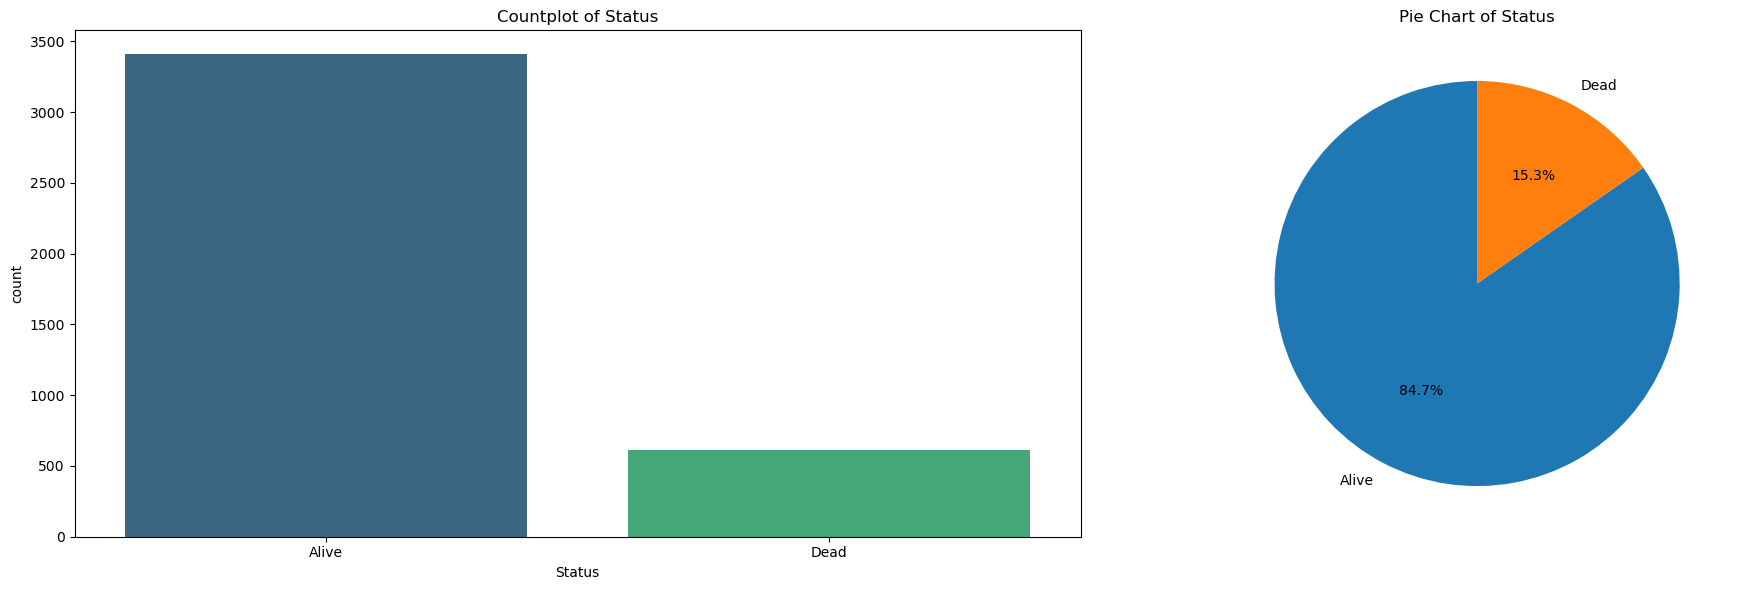

In [12]:
plt.figure(figsize = (20 ,6))

plt.subplot(1, 2 ,1)
sns.countplot(data = data, x = 'Status', hue = 'Status', palette = 'viridis')
plt.title('Countplot of Status')

plt.subplot(1, 2, 2)
status_counts = data['Status'].value_counts()
plt.pie(status_counts, labels = status_counts.index, autopct = '%1.1f%%', startangle = 90)
plt.title('Pie Chart of Status')

plt.tight_layout()
plt.show()

Observation: The target feature is skewed towards Alive category hence, this is a imbalanced dataset on target feature

<b>Feature Engineering for feature 0: We will encode this feature through one-hot encoding (no ordinal relationship)

<h3>Feature 1: Progesterone Status

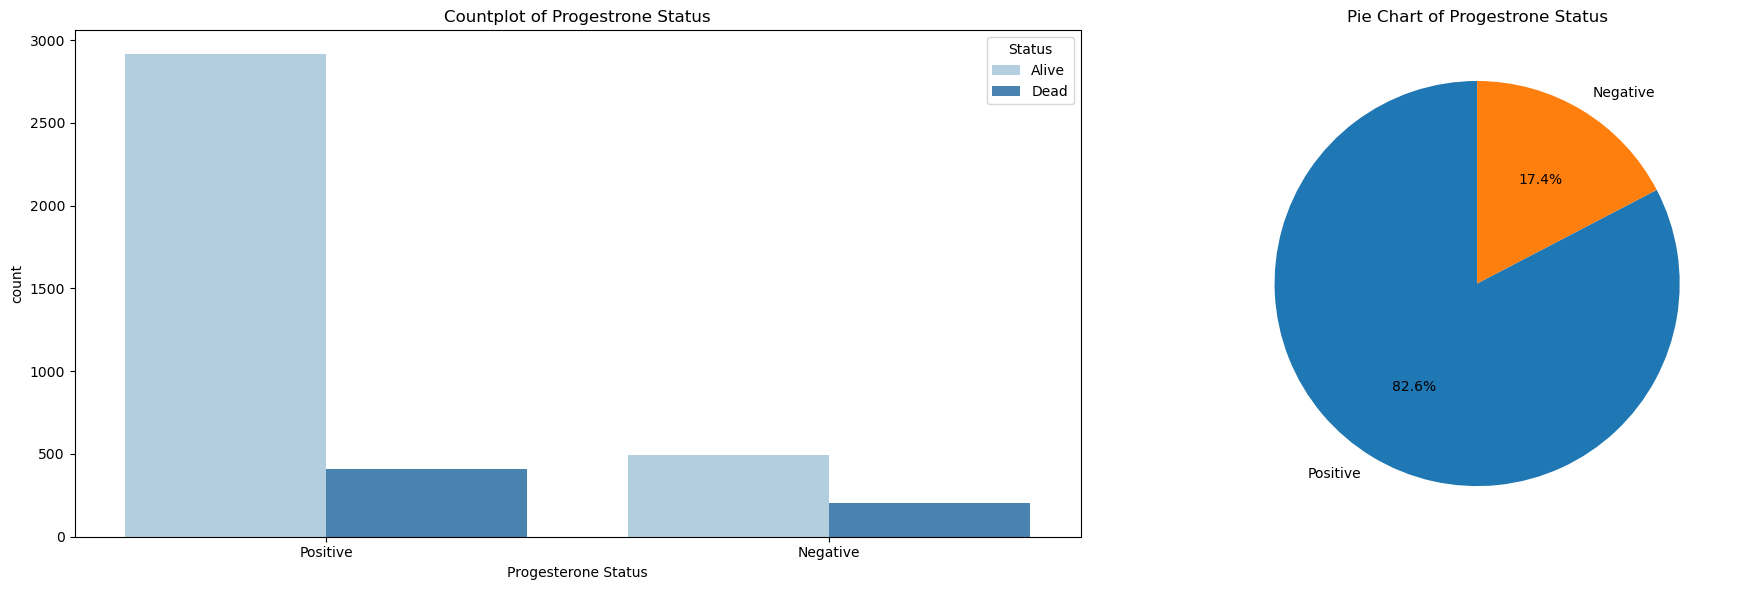

In [13]:
plt.figure(figsize = (20, 6))

plt.subplot(1, 2, 1)
sns.countplot(data = data, x = 'Progesterone Status', hue = 'Status', palette = 'Blues')
plt.title('Countplot of Progestrone Status')

plt.subplot(1, 2, 2)
progestrone_status_counts = data['Progesterone Status'].value_counts()
plt.pie(progestrone_status_counts, labels = progestrone_status_counts.index, autopct= '%1.1f%%', startangle = 90)
plt.title('Pie Chart of Progestrone Status')

plt.tight_layout()
plt.show()

<b>Feature Engineering for feature 1: We will encode this feature with one-hot encoding (no ordinal relationship)

<h3> Feature 3: Estrogen Status

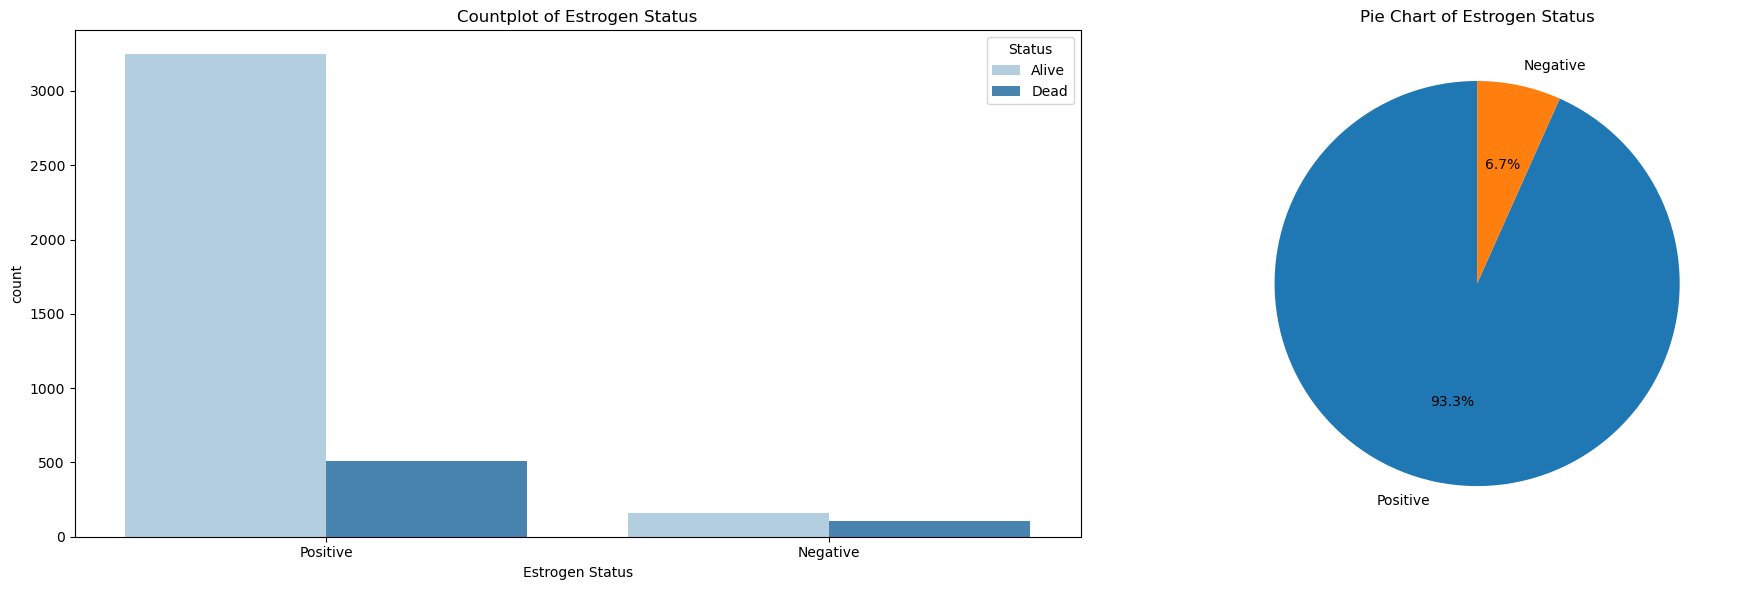

In [14]:
plt.figure(figsize = (20, 6))

plt.subplot(1, 2, 1)
sns.countplot(data = data, x ='Estrogen Status', hue = 'Status', palette = 'Blues')
plt.title('Countplot of Estrogen Status')

plt.subplot(1, 2, 2)
estrogen_status_counts = data['Estrogen Status'].value_counts()
plt.pie(estrogen_status_counts, labels = estrogen_status_counts.index, autopct = '%1.1f%%', startangle = 90)
plt.title('Pie Chart of Estrogen Status')

plt.tight_layout()
plt.show()

<b>Feature Engineering for feature 3: We will encode this feature through one-hot encoding (no ordinal relationship)

<h3> Feature 4: A Stage

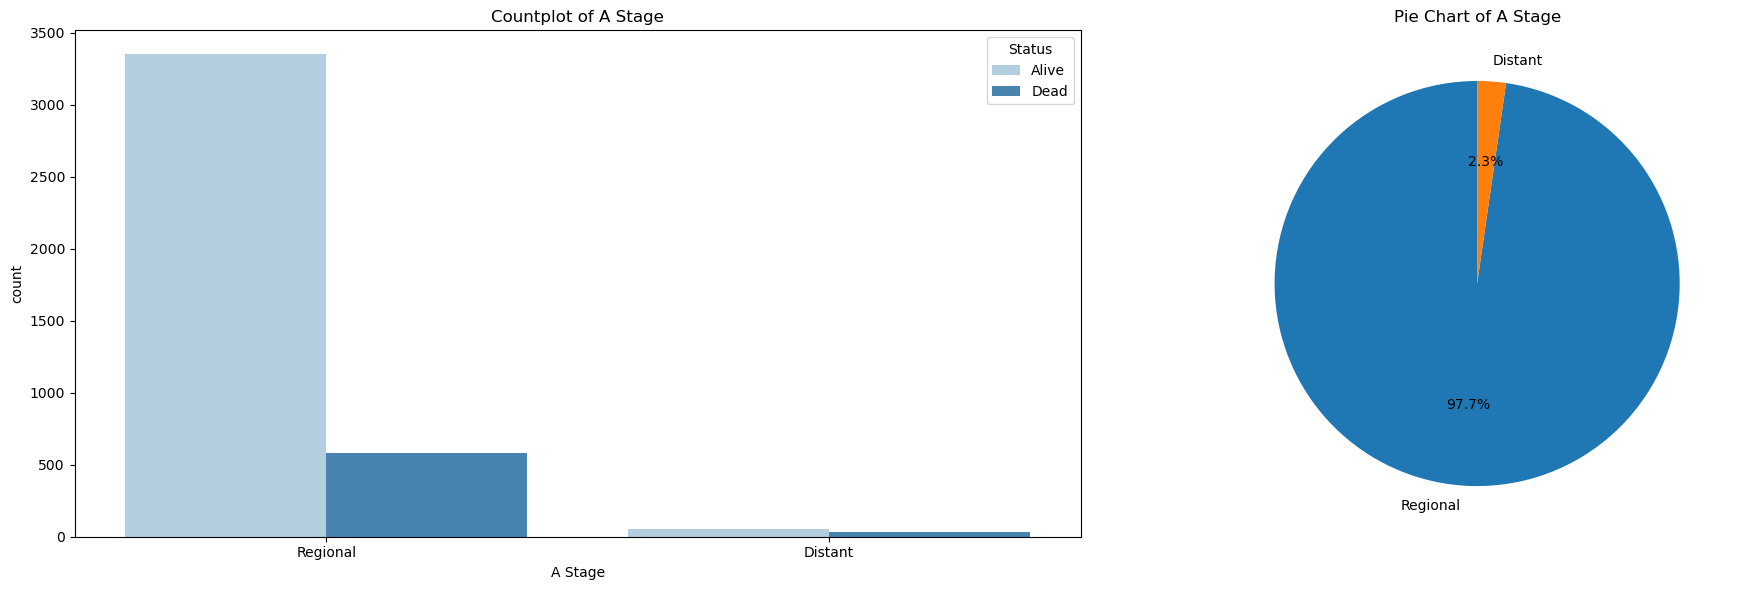

In [15]:
plt.figure(figsize = (20, 6))

plt.subplot(1, 2, 1)
sns.countplot(data = data, x = 'A Stage', hue = 'Status', palette = 'Blues')
plt.title('Countplot of A Stage')

plt.subplot(1, 2, 2)
a_stage_counts = data['A Stage'].value_counts()
plt.pie(a_stage_counts, labels = a_stage_counts.index, autopct = '%1.1f%%', startangle = 90)
plt.title('Pie Chart of A Stage')

plt.tight_layout()
plt.show()

<b>Feature Engineering for feature 3: We will encode this feature through one-hot encoding (no ordinal relationship)

<h3> Feature 5: Grade

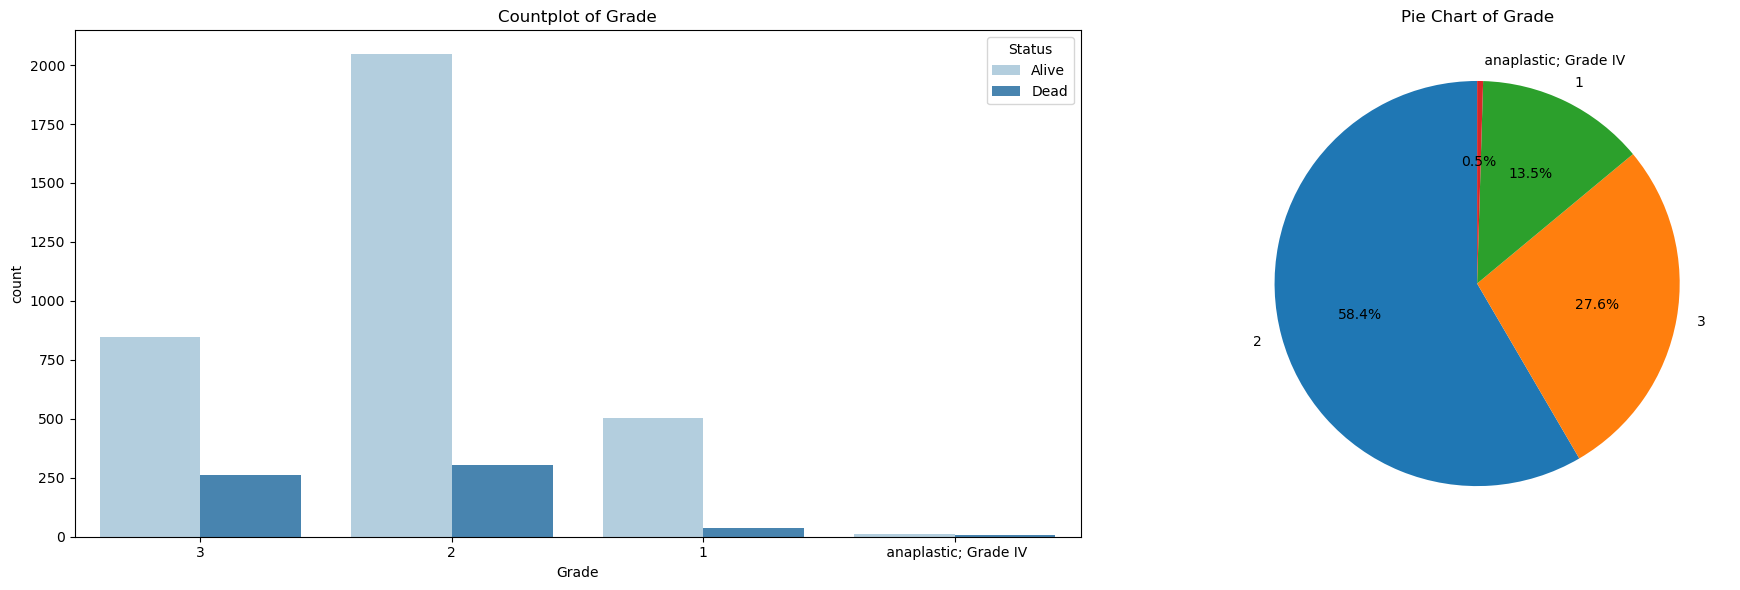

In [16]:
plt.figure(figsize = (20, 6))

plt.subplot(1, 2, 1)
sns.countplot(data = data, x = 'Grade', hue = 'Status', palette = 'Blues')
plt.title('Countplot of Grade')

plt.subplot(1, 2, 2)
grade_counts = data['Grade'].value_counts()
plt.pie(grade_counts, labels = grade_counts.index, autopct = '%1.1f%%', startangle = 90)
plt.title('Pie Chart of Grade')

plt.tight_layout()
plt.show()

<b> Feature Engineering for feature 5: We will be encoding the feature using ordinal encoding since, Grade here refers to the aggressiveness of the tumor meaning, Grade 1 < Grade 2 < Grade 3 < Grade 4. 

<h3> Feature 6: differentiate

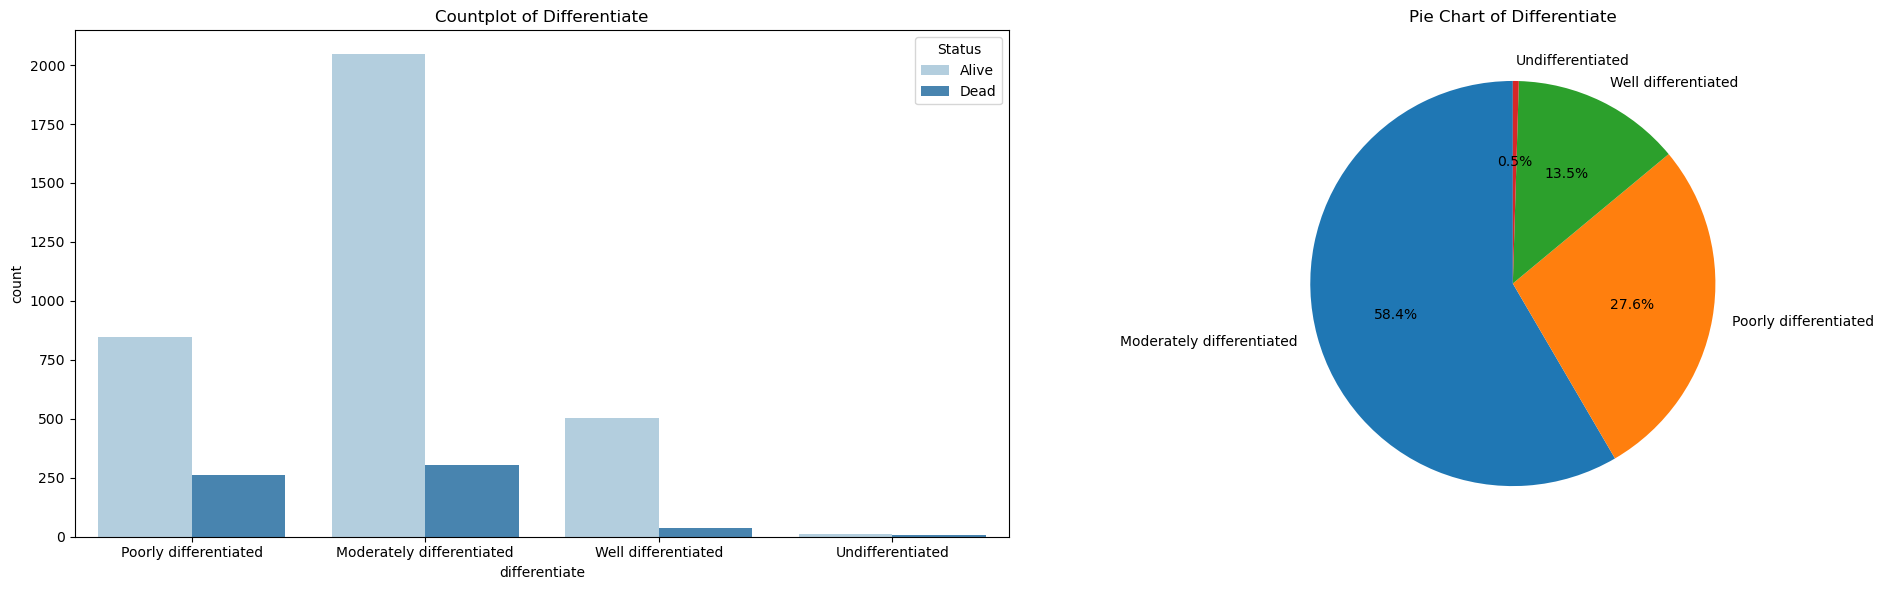

In [17]:
plt.figure(figsize = (20, 6))

plt.subplot(1, 2, 1)
sns.countplot(data = data, x = 'differentiate', hue = 'Status', palette = 'Blues')
plt.title('Countplot of Differentiate')

plt.subplot(1, 2, 2)
differentiate_counts = data['differentiate'].value_counts()
plt.pie(differentiate_counts, labels = differentiate_counts.index, autopct = '%1.1f%%', startangle = 90)
plt.title('Pie Chart of Differentiate')

plt.tight_layout()
plt.show()

Observation: Both feature Grade and differentiate have the same distribution, just different labels. This could be a coincidence

<b> Feature Engineering for feature 6: We will be using ordinal encoding to encode this feature

<h3> Feature 7: 6th Stage

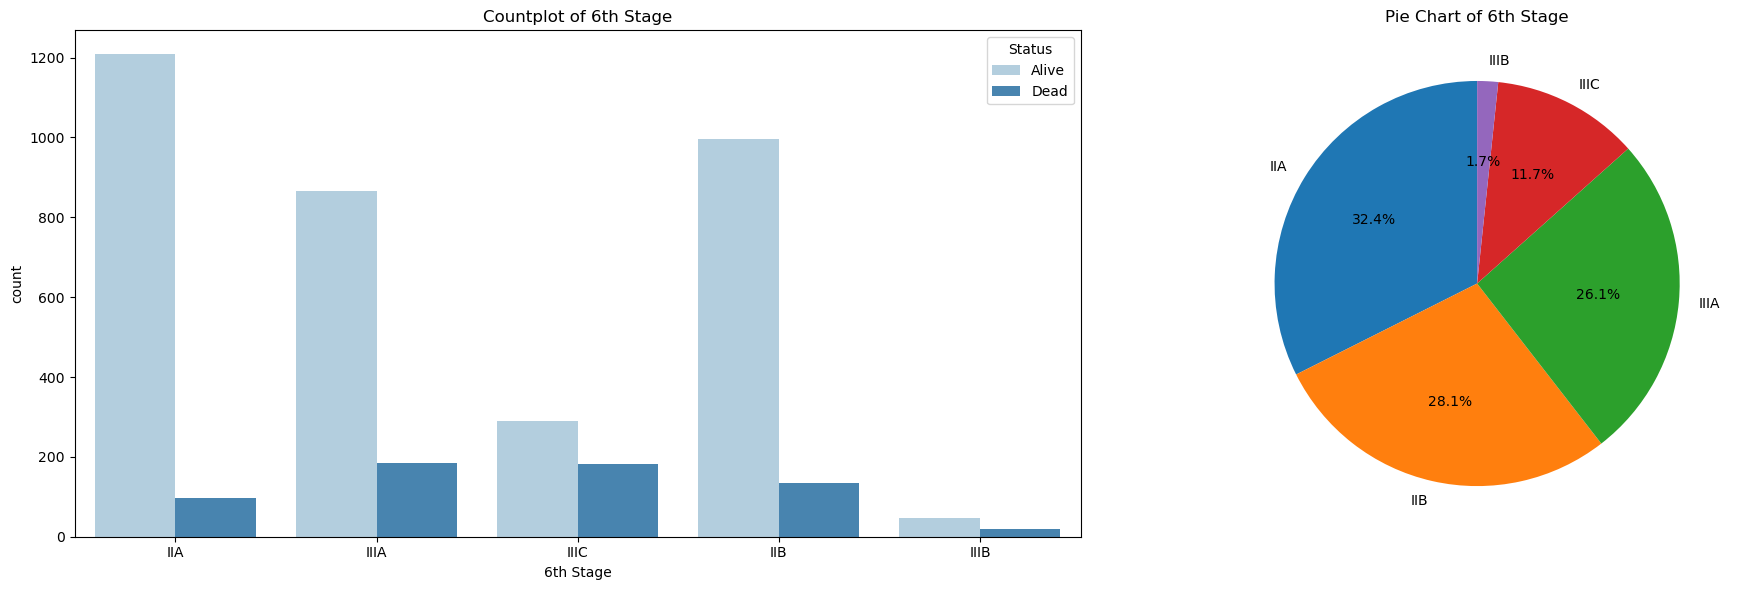

In [18]:
plt.figure(figsize = (20, 6))

plt.subplot(1, 2, 1)
sns.countplot(data = data, x = '6th Stage', hue = 'Status', palette = 'Blues')
plt.title('Countplot of 6th Stage')

plt.subplot(1, 2, 2)
sixth_stage_counts = data['6th Stage'].value_counts()
plt.pie(sixth_stage_counts, labels = sixth_stage_counts.index, autopct = '%1.1f%%', startangle = 90)
plt.title('Pie Chart of 6th Stage')

plt.tight_layout()
plt.show()

<b> Feature Engineering for feature 7: We will be using ordinal encoding to encode this feature

<h3> Feature 8: N Stage

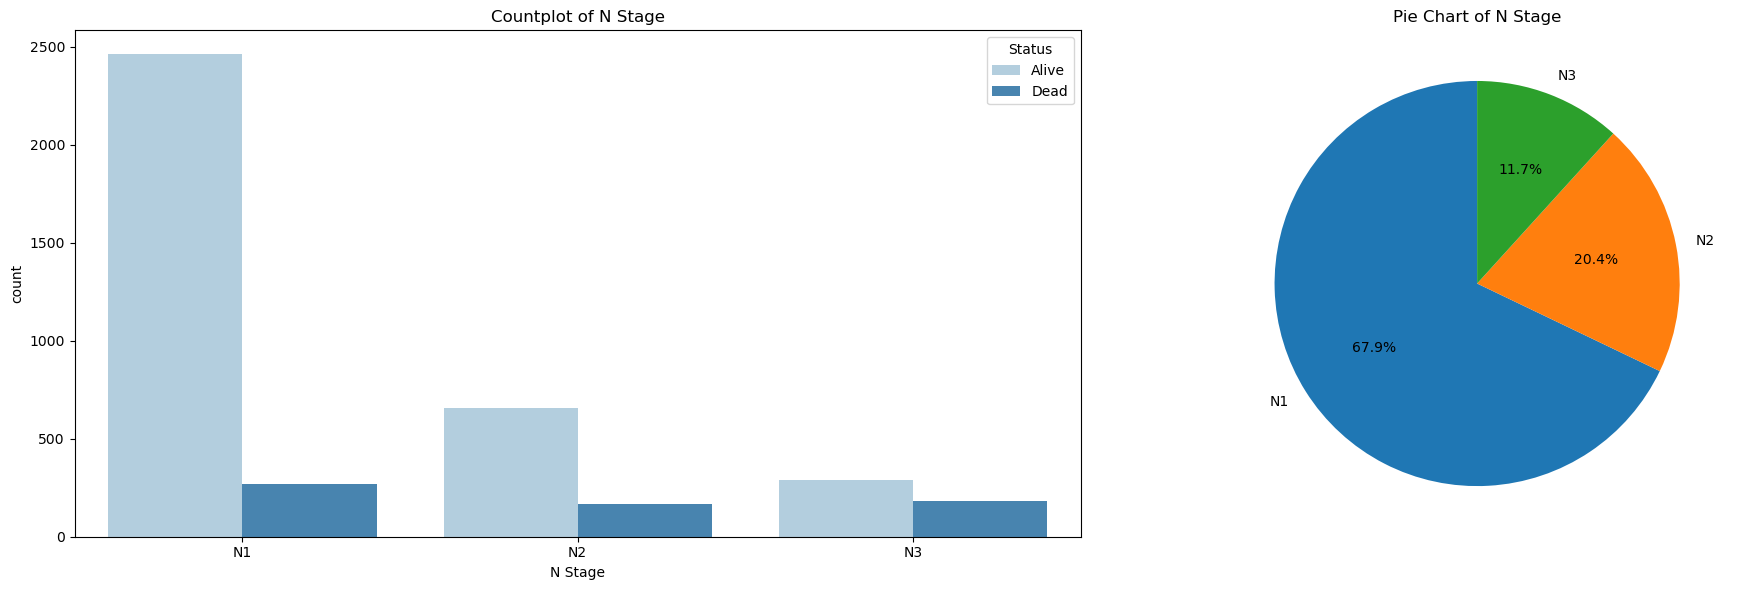

In [19]:
plt.figure(figsize = (20, 6))

plt.subplot(1, 2, 1)
sns.countplot(data = data, x = 'N Stage', hue = 'Status', palette = 'Blues')
plt.title('Countplot of N Stage')

plt.subplot(1, 2, 2)
n_stage_counts = data['N Stage'].value_counts()
plt.pie(n_stage_counts, labels = n_stage_counts.index, autopct = '%1.1f%%', startangle = 90)
plt.title('Pie Chart of N Stage')

plt.tight_layout()
plt.show()

<b> Feature Engineering for feature 8: We will be using ordinal encoding to encode this feature

<h3> Feature 9: T Stage

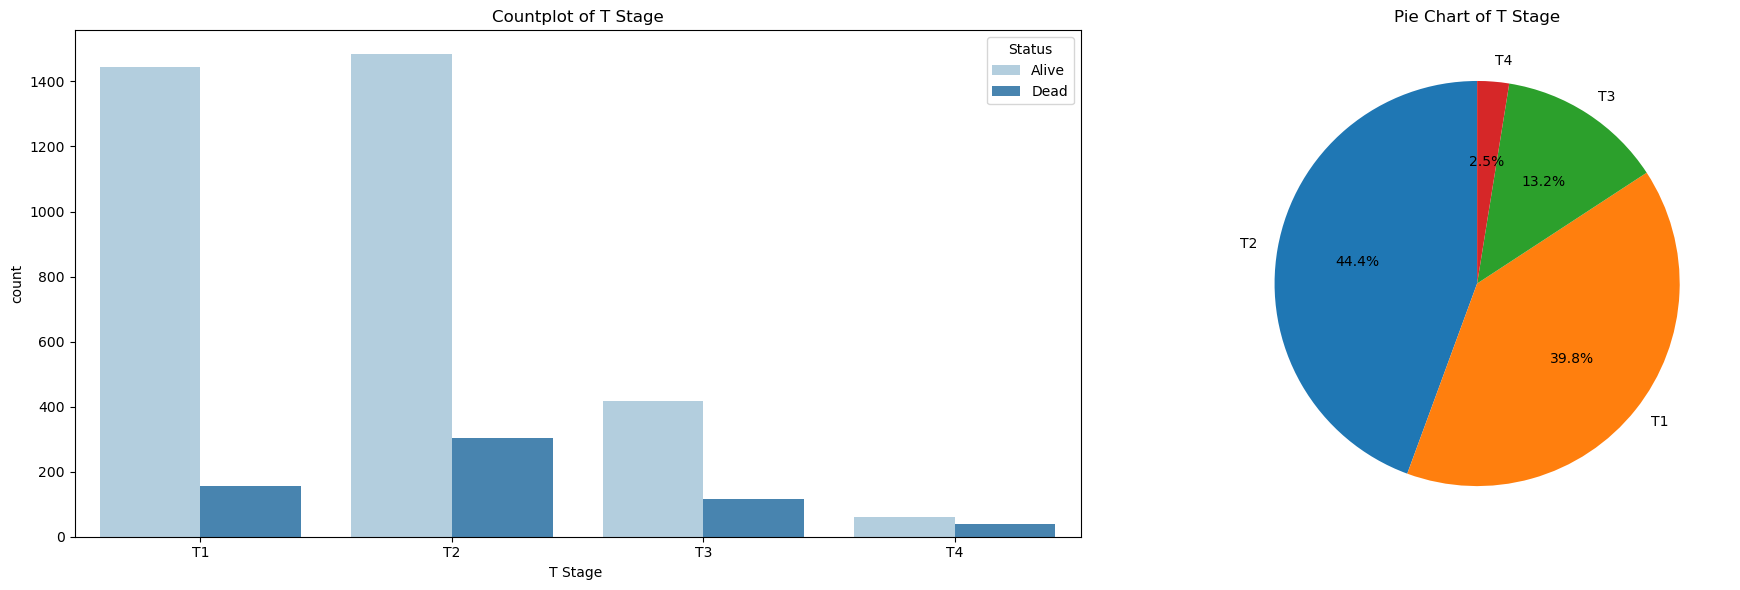

In [20]:
plt.figure(figsize = (20, 6))

plt.subplot(1, 2, 1)
sns.countplot(data = data, x = 'T Stage ', hue = 'Status', palette = 'Blues')
plt.title('Countplot of T Stage')

plt.subplot(1, 2, 2)
t_stage_counts = data['T Stage '].value_counts()
plt.pie(t_stage_counts, labels = t_stage_counts.index, autopct = '%1.1f%%', startangle = 90)
plt.title('Pie Chart of T Stage')

plt.tight_layout()
plt.show()

<b> Feature Engineering for feature 9: We will be using ordinal encoding to encode this feature

<h3> Feature 10: Marital Status

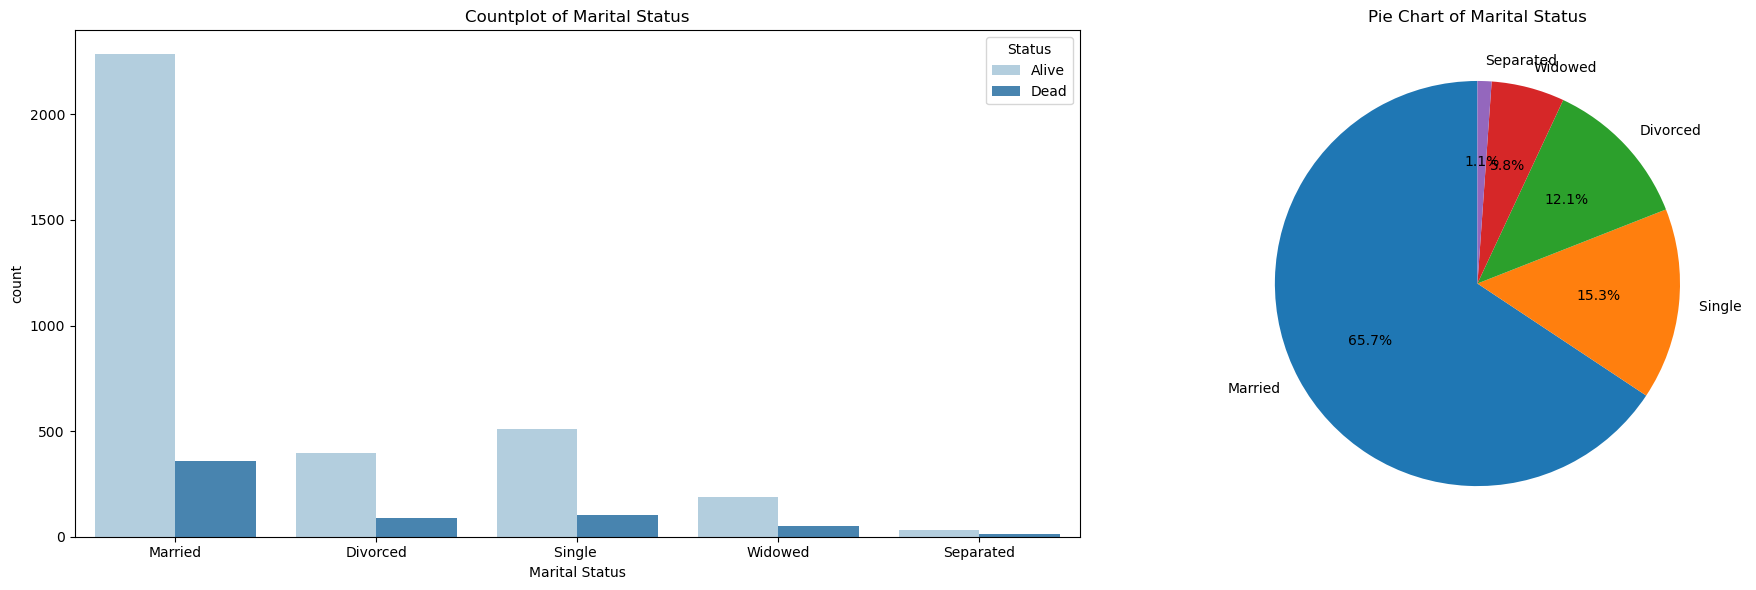

In [21]:
plt.figure(figsize = (20, 6))

plt.subplot(1, 2, 1)
sns.countplot(data = data, x = 'Marital Status', hue = 'Status', palette = 'Blues')
plt.title('Countplot of Marital Status')

plt.subplot(1, 2, 2)
marital_status_counts = data['Marital Status'].value_counts()
plt.pie(marital_status_counts, labels = marital_status_counts.index, autopct = '%1.1f%%', startangle = 90)
plt.title('Pie Chart of Marital Status')

plt.tight_layout()
plt.show()

<b> Feature engineering for the feature 10: We will using nominal encoding for this feature since there is no ordinal relationship in this feature. But here we have to make a decision since we can do either one-hot encoding or label encoding but if we do one-hot encoding, the dimensionality of the data will increase and if we opt for label encoding, it may introduce un-intentional ordianlity in the feature. 

<h3> Feature 11: Race

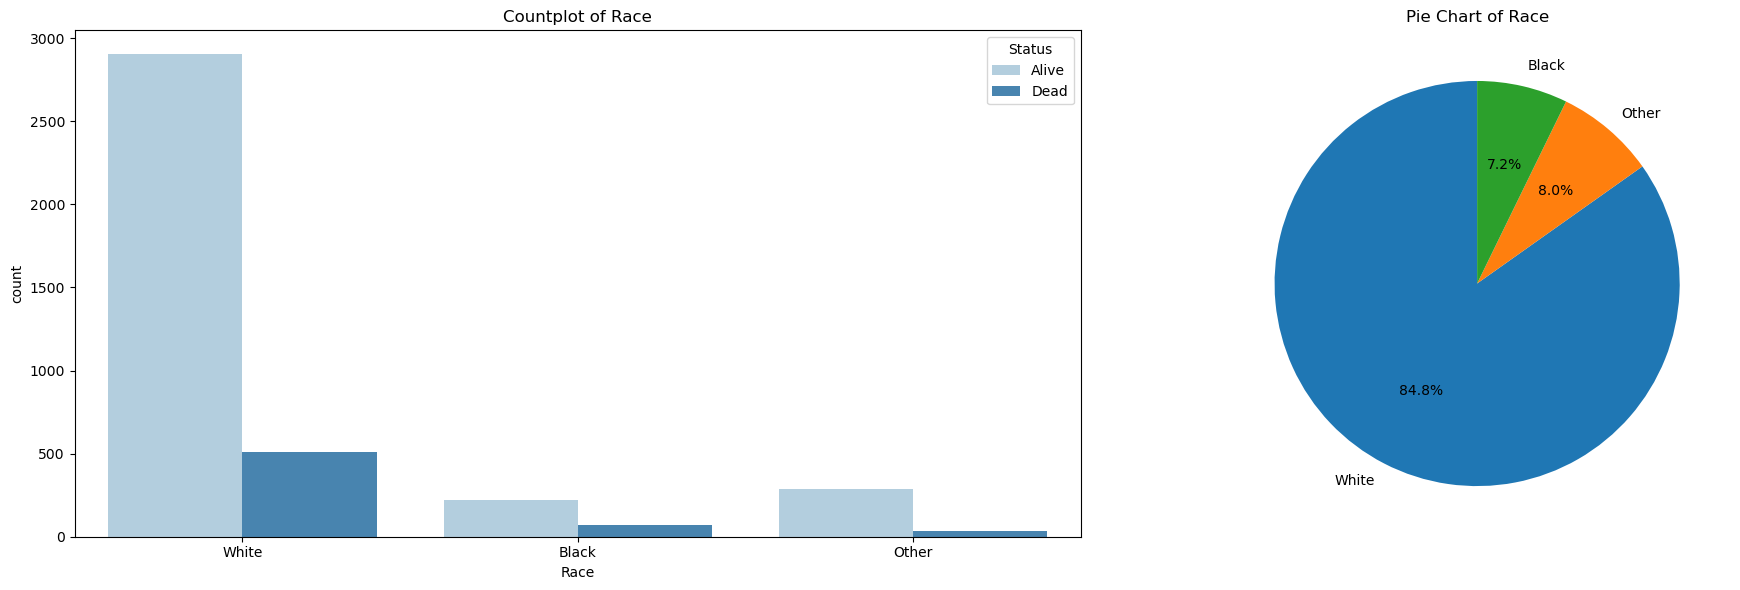

In [22]:
plt.figure(figsize = (20, 6))

plt.subplot(1, 2, 1)
sns.countplot(data = data, x = 'Race', hue = 'Status', palette = 'Blues')
plt.title('Countplot of Race')

plt.subplot(1, 2, 2)
race_counts = data['Race'].value_counts()
plt.pie(race_counts, labels = race_counts.index, autopct = '%1.1f%%', startangle = 90)
plt.title('Pie Chart of Race')

plt.tight_layout()
plt.show()

<b> Feature Engineering for feature 11: We will be using nominal encoding to encode this feature

<h3> Feature 12: Survival Months

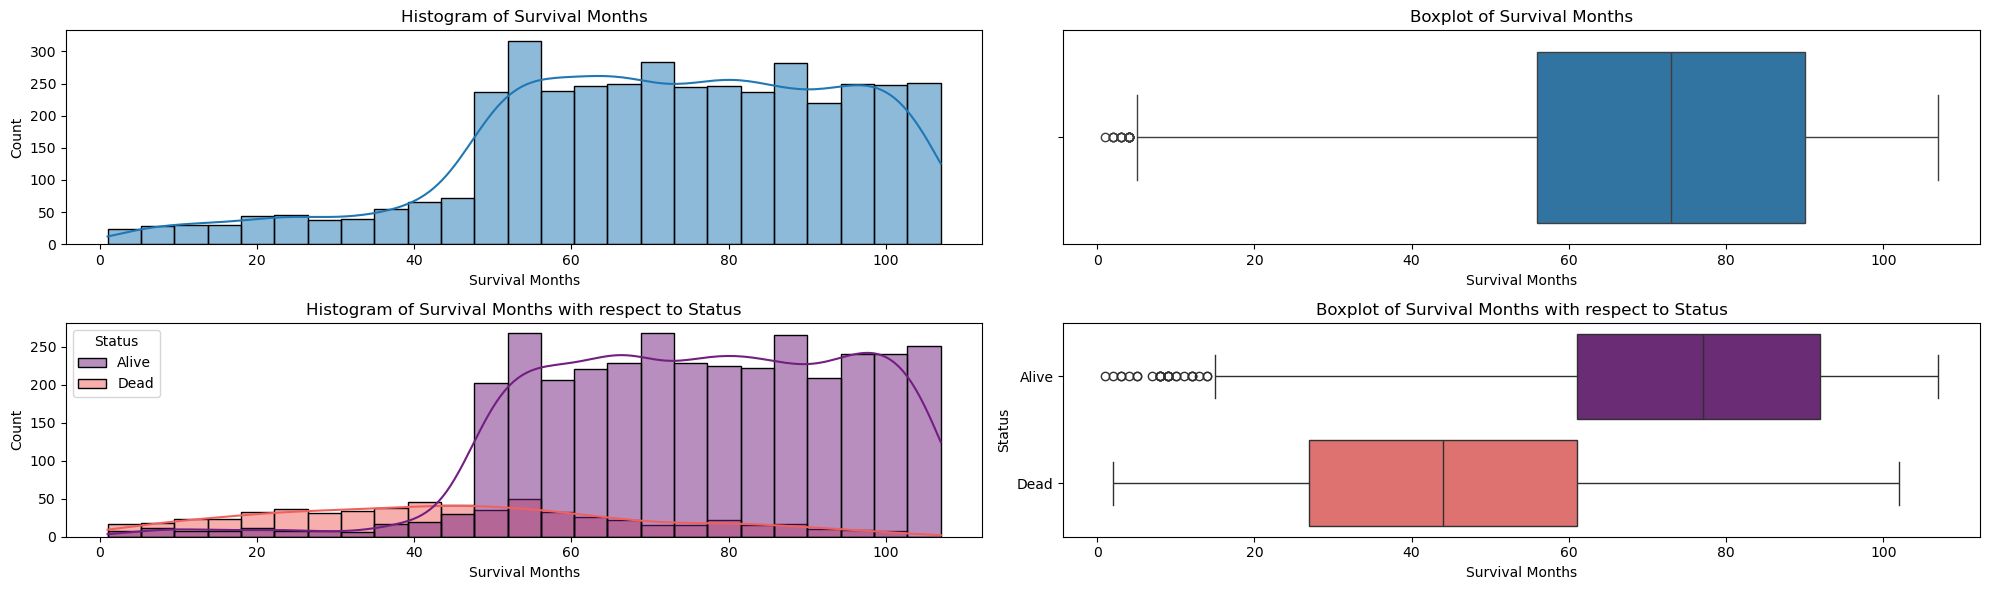

In [23]:
plt.figure(figsize = (20, 6))

plt.subplot(2, 2, 1)
sns.histplot(data = data, x = 'Survival Months', kde = True)
plt.title('Histogram of Survival Months')

plt.subplot(2, 2, 2)
sns.boxplot(data = data, x = 'Survival Months')
plt.title('Boxplot of Survival Months')

plt.subplot(2, 2, 3)
sns.histplot(data = data, x = 'Survival Months', hue = 'Status', palette = 'magma', kde = True)
plt.title('Histogram of Survival Months with respect to Status')

plt.subplot(2, 2, 4)
sns.boxplot(data = data, x = 'Survival Months', y = 'Status', hue = 'Status',palette = 'magma')
plt.title('Boxplot of Survival Months with respect to Status')

plt.tight_layout()
plt.show()

<h3> Feature 13: Reginol Node Positive

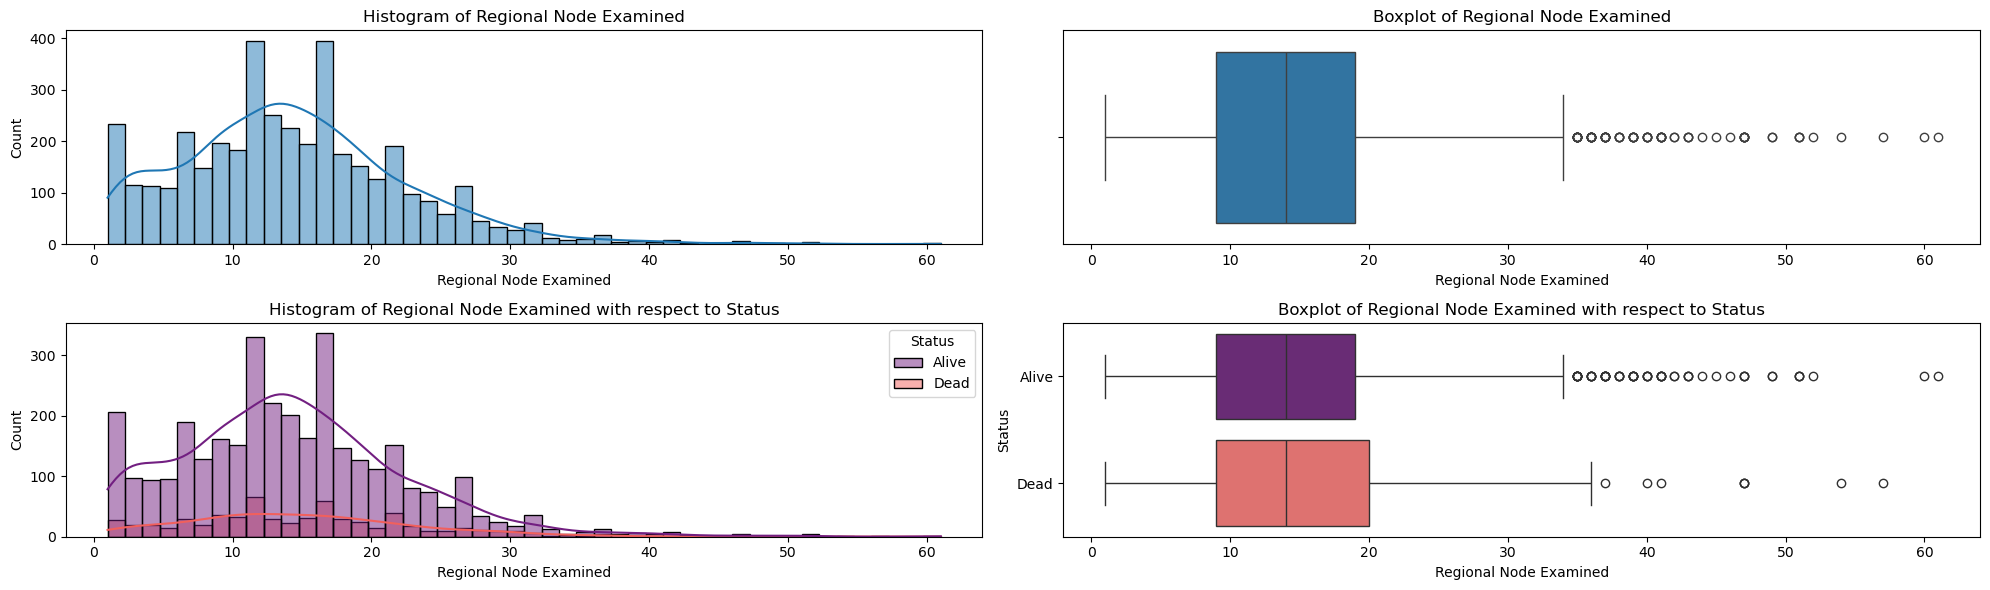

In [24]:
plt.figure(figsize = (20, 6))

plt.subplot(2, 2, 1)
sns.histplot(data = data, x = 'Regional Node Examined', kde = True)
plt.title('Histogram of Regional Node Examined')

plt.subplot(2, 2, 2)
sns.boxplot(data = data, x = 'Regional Node Examined')
plt.title('Boxplot of Regional Node Examined')

plt.subplot(2, 2, 3)
sns.histplot(data = data, x = 'Regional Node Examined', hue = 'Status', palette = 'magma', kde = True)
plt.title('Histogram of Regional Node Examined with respect to Status')

plt.subplot(2, 2, 4)
sns.boxplot(data = data, x = 'Regional Node Examined', y = 'Status', hue = 'Status',palette = 'magma')
plt.title('Boxplot of Regional Node Examined with respect to Status')

plt.tight_layout()
plt.show()

<h3> Feature 14: Tumor Size

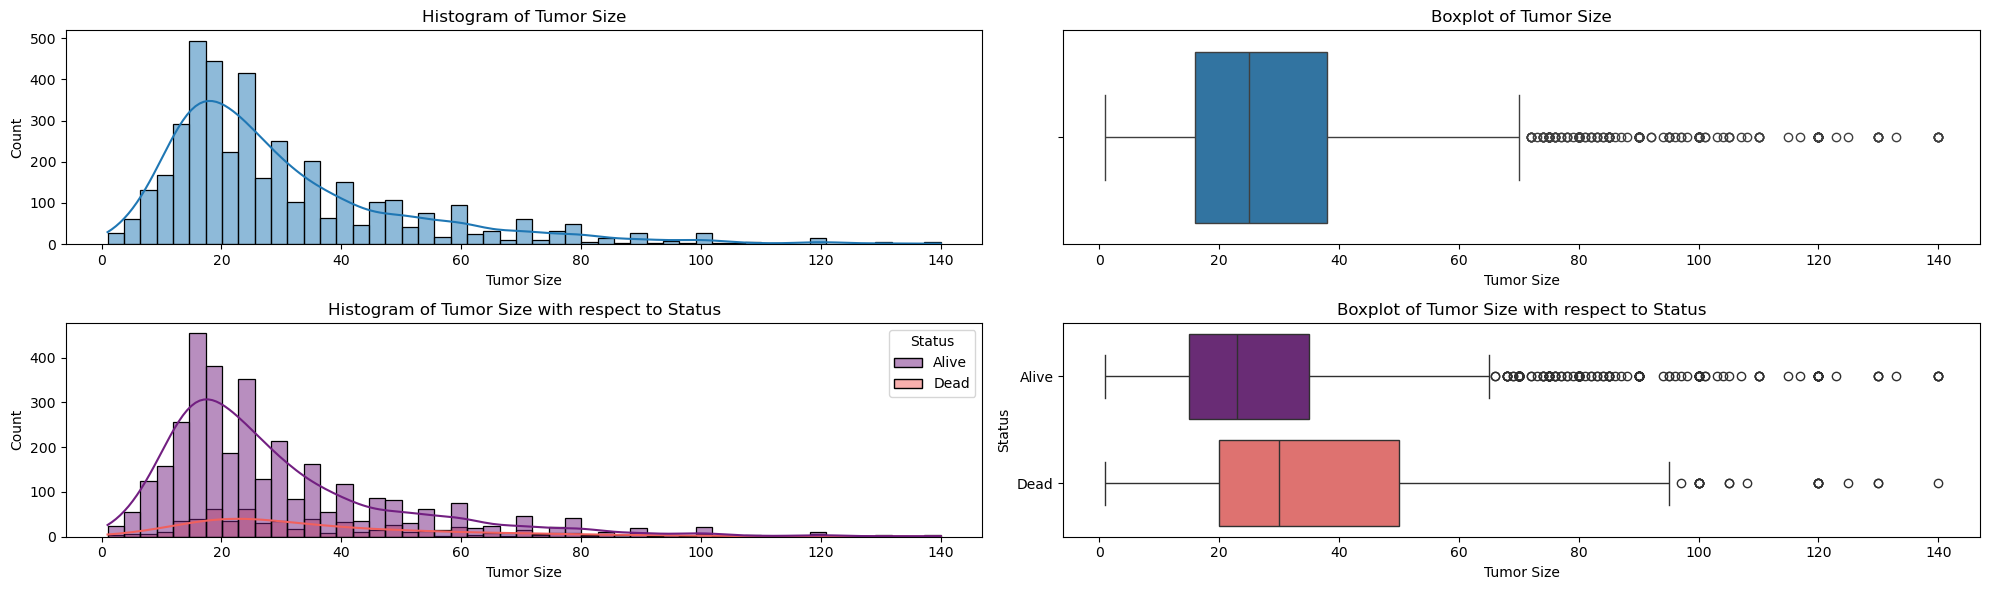

In [25]:
plt.figure(figsize = (20, 6))

plt.subplot(2, 2, 1)
sns.histplot(data = data, x = 'Tumor Size', kde = True)
plt.title('Histogram of Tumor Size')

plt.subplot(2, 2, 2)
sns.boxplot(data = data, x = 'Tumor Size')
plt.title('Boxplot of Tumor Size')

plt.subplot(2, 2, 3)
sns.histplot(data = data, x = 'Tumor Size', hue = 'Status', palette = 'magma', kde = True)
plt.title('Histogram of Tumor Size with respect to Status')

plt.subplot(2, 2, 4)
sns.boxplot(data = data, x = 'Tumor Size', y = 'Status', hue = 'Status',palette = 'magma')
plt.title('Boxplot of Tumor Size with respect to Status')

plt.tight_layout()
plt.show()

<h3> Feature 15: Age

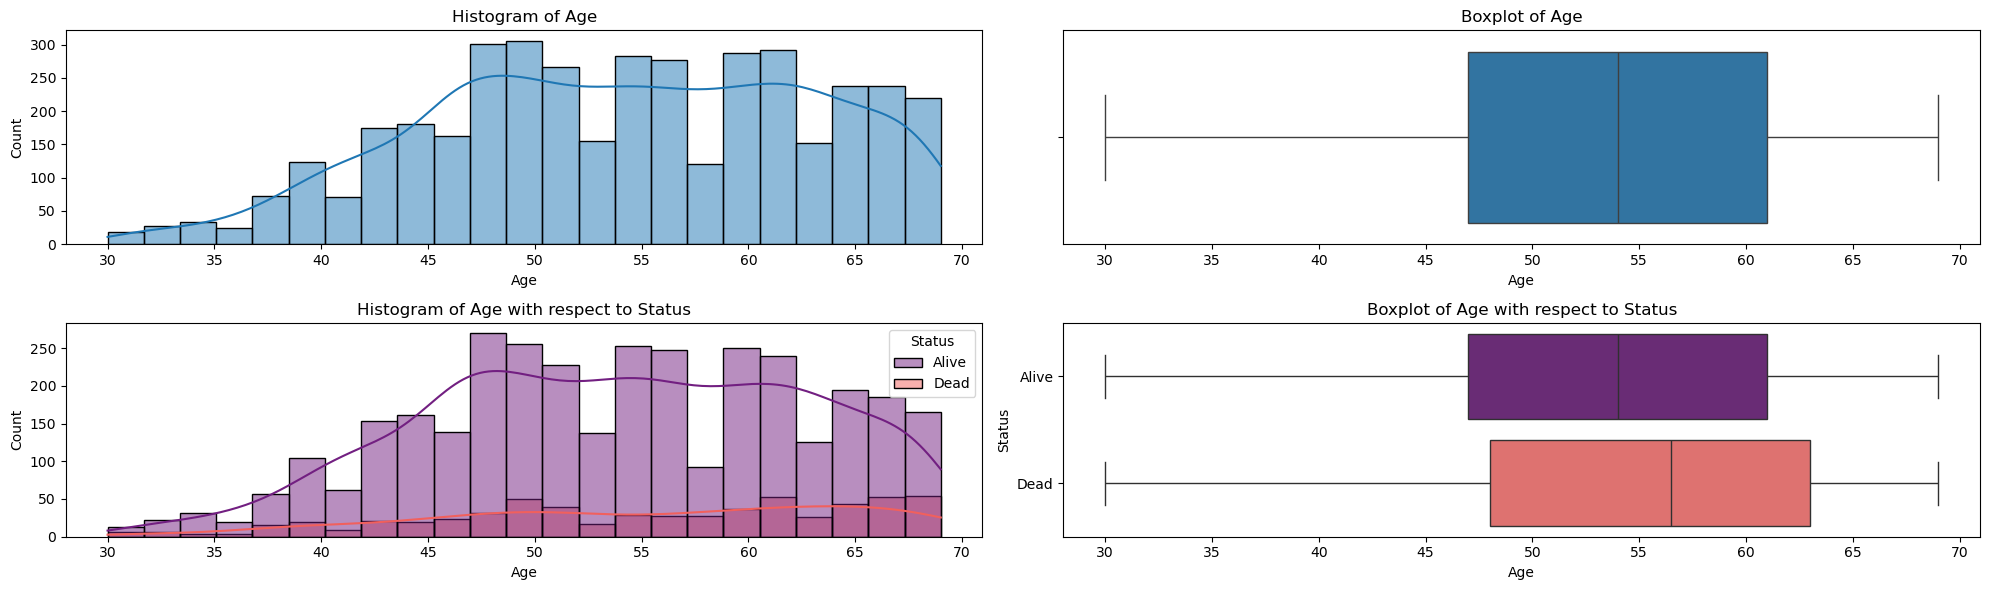

In [26]:
plt.figure(figsize = (20, 6))

plt.subplot(2, 2, 1)
sns.histplot(data = data, x = 'Age', kde = True)
plt.title('Histogram of Age')

plt.subplot(2, 2, 2)
sns.boxplot(data = data, x = 'Age')
plt.title('Boxplot of Age')

plt.subplot(2, 2, 3)
sns.histplot(data = data, x = 'Age', hue = 'Status', palette = 'magma', kde = True)
plt.title('Histogram of Age with respect to Status')

plt.subplot(2, 2, 4)
sns.boxplot(data = data, x = 'Age', y = 'Status', hue = 'Status',palette = 'magma')
plt.title('Boxplot of Age with respect to Status')

plt.tight_layout()
plt.show()

Since, We will be using decision trees, 
1. Decision trees are less sensitive towards outliers, and since this is medical data, removing the outliers would be counterproductive and may cause the loss of some valuable information.
2. No parametric assumptions: Decision tress do not presume any underlying distribution unlike many linear models.
3. No need for encoding categorical features: Decision trees can handle both categorical and non-categorical features at the same time, so it isn't required to encode them.

But since, scikit-learn's implementation doesn't support it natively and since there are ordinal relationships in the data, we will be encoding the features

<Figure size 2000x2000 with 0 Axes>

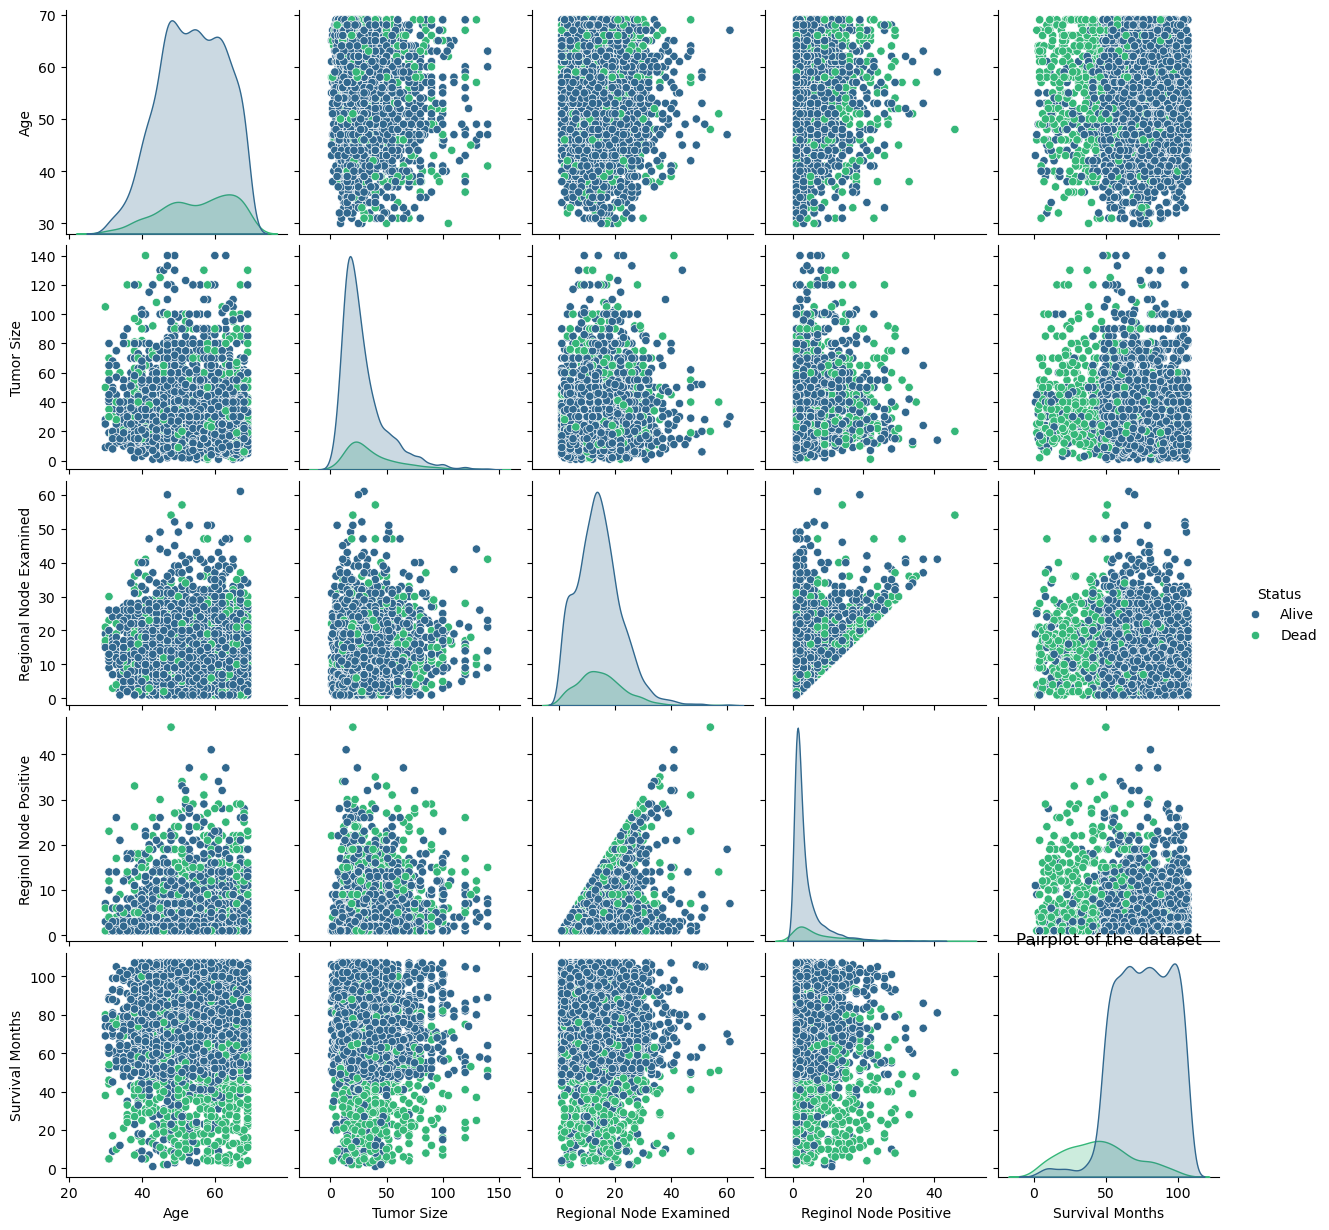

In [27]:
plt.figure(figsize = (20, 20))
sns.pairplot(data, hue = 'Status', palette = 'viridis')
plt.title('Pairplot of the dataset')
plt.show()

In [28]:
# Encoding the nominal categorical features
encoded_data = pd.get_dummies(data = data, columns = ['Status', 'Progesterone Status', 'Estrogen Status', 'A Stage', 'Race', 'Marital Status'], drop_first = True)
encoded_data.head()

,Age,T Stage,N Stage,6th Stage,differentiate,Grade,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months,Status_Dead,Progesterone Status_Positive,Estrogen Status_Positive,A Stage_Regional,Race_Other,Race_White,Marital Status_Married,Marital Status_Separated,Marital Status_Single,Marital Status_Widowed
0,68,T1,N1,IIA,Poorly differentiated,3,4,24,1,60,False,True,True,True,False,True,True,False,False,False
1,50,T2,N2,IIIA,Moderately differentiated,2,35,14,5,62,False,True,True,True,False,True,True,False,False,False
2,58,T3,N3,IIIC,Moderately differentiated,2,63,14,7,75,False,True,True,True,False,True,False,False,False,False
3,58,T1,N1,IIA,Poorly differentiated,3,18,2,1,84,False,True,True,True,False,True,True,False,False,False
4,47,T2,N1,IIB,Poorly differentiated,3,41,3,1,50,False,True,True,True,False,True,True,False,False,False


In [29]:
encoded_data.shape

(4023, 20)

In [30]:
print(categorical_features)

['Race', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage', 'differentiate', 'Grade', 'A Stage', 'Estrogen Status', 'Progesterone Status', 'Status']


In [31]:
# Encoding the ordinal categorical features
label_encoder = LabelEncoder()
encoded_data['T Stage encoded'] = label_encoder.fit_transform(data['T Stage '])
encoded_data['N Stage encoded'] = label_encoder.fit_transform(data['N Stage'])
encoded_data['Grade encoded'] = label_encoder.fit_transform(data['Grade'])
encoded_data['6th Stage encoded'] = label_encoder.fit_transform(data['6th Stage'])
encoded_data['differentiate encoded'] = label_encoder.fit_transform(data['differentiate'])

encoded_data.head()

,Age,T Stage,N Stage,6th Stage,differentiate,Grade,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months,...,Race_White,Marital Status_Married,Marital Status_Separated,Marital Status_Single,Marital Status_Widowed,T Stage encoded,N Stage encoded,Grade encoded,6th Stage encoded,differentiate encoded
0,68,T1,N1,IIA,Poorly differentiated,3,4,24,1,60,...,True,True,False,False,False,0,0,3,0,1
1,50,T2,N2,IIIA,Moderately differentiated,2,35,14,5,62,...,True,True,False,False,False,1,1,2,2,0
2,58,T3,N3,IIIC,Moderately differentiated,2,63,14,7,75,...,True,False,False,False,False,2,2,2,4,0
3,58,T1,N1,IIA,Poorly differentiated,3,18,2,1,84,...,True,True,False,False,False,0,0,3,0,1
4,47,T2,N1,IIB,Poorly differentiated,3,41,3,1,50,...,True,True,False,False,False,1,0,3,1,1


In [32]:
# Removing the original ordinal categorical features
encoded_data.drop(['T Stage ', 'N Stage', 'Grade', '6th Stage', 'differentiate'], axis = 1, inplace = True)

In [33]:
encoded_data.shape

(4023, 20)

In [34]:
encoded_data.head()

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months,Status_Dead,Progesterone Status_Positive,Estrogen Status_Positive,A Stage_Regional,Race_Other,Race_White,Marital Status_Married,Marital Status_Separated,Marital Status_Single,Marital Status_Widowed,T Stage encoded,N Stage encoded,Grade encoded,6th Stage encoded,differentiate encoded
0,68,4,24,1,60,False,True,True,True,False,True,True,False,False,False,0,0,3,0,1
1,50,35,14,5,62,False,True,True,True,False,True,True,False,False,False,1,1,2,2,0
2,58,63,14,7,75,False,True,True,True,False,True,False,False,False,False,2,2,2,4,0
3,58,18,2,1,84,False,True,True,True,False,True,True,False,False,False,0,0,3,0,1
4,47,41,3,1,50,False,True,True,True,False,True,True,False,False,False,1,0,3,1,1


# Model Training and Evaluation

In [35]:
# Defining dependent and independent features
X = encoded_data.drop(columns = ['Status_Dead'], axis = 1)
y = encoded_data['Status_Dead']

In [36]:
# Defining the decision tree classifier
decision_tree_classifier = DecisionTreeClassifier(criterion = 'gini', random_state = 52)

In [37]:
kf = KFold(n_splits=5, shuffle=True, random_state=52)

In [38]:
# Defining empty arrays to store true labels and predictions
y_true = np.array([])
y_pred = np.array([])

In [39]:
# Performing 5-fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    decision_tree_classifier.fit(X_train, y_train)
    
    y_test_pred = decision_tree_classifier.predict(X_test)
    
    y_true = np.concatenate([y_true, y_test])
    y_pred = np.concatenate([y_pred, y_test_pred])

In [40]:
cm = confusion_matrix(y_true, y_pred)

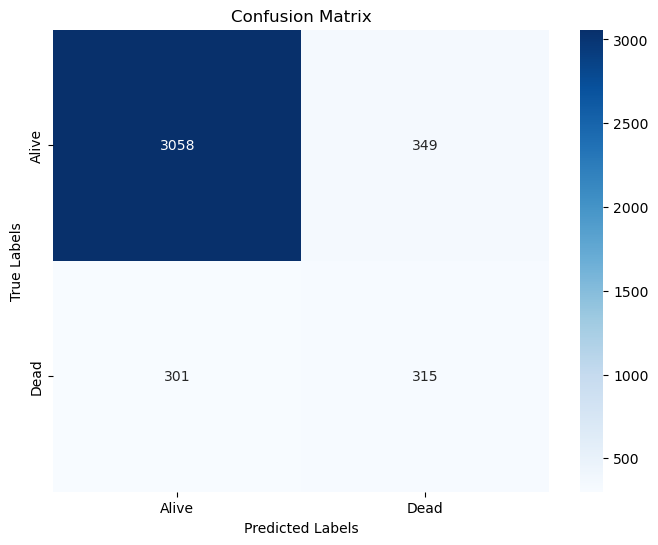

In [41]:
# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Alive', 'Dead'], yticklabels=['Alive', 'Dead'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [42]:
cv_scores = cross_val_score(decision_tree_classifier, X, y, cv=kf, scoring='accuracy')

In [43]:
print("Cross-validation scores: ", cv_scores)
print("Mean accuracy: ", cv_scores.mean())
print("Standard deviation of accuracy: ", cv_scores.std())

Cross-validation scores:  [0.85714286 0.85093168 0.82857143 0.83084577 0.82462687]
Mean accuracy:  0.8384237199097679
Standard deviation of accuracy:  0.013051446117303972


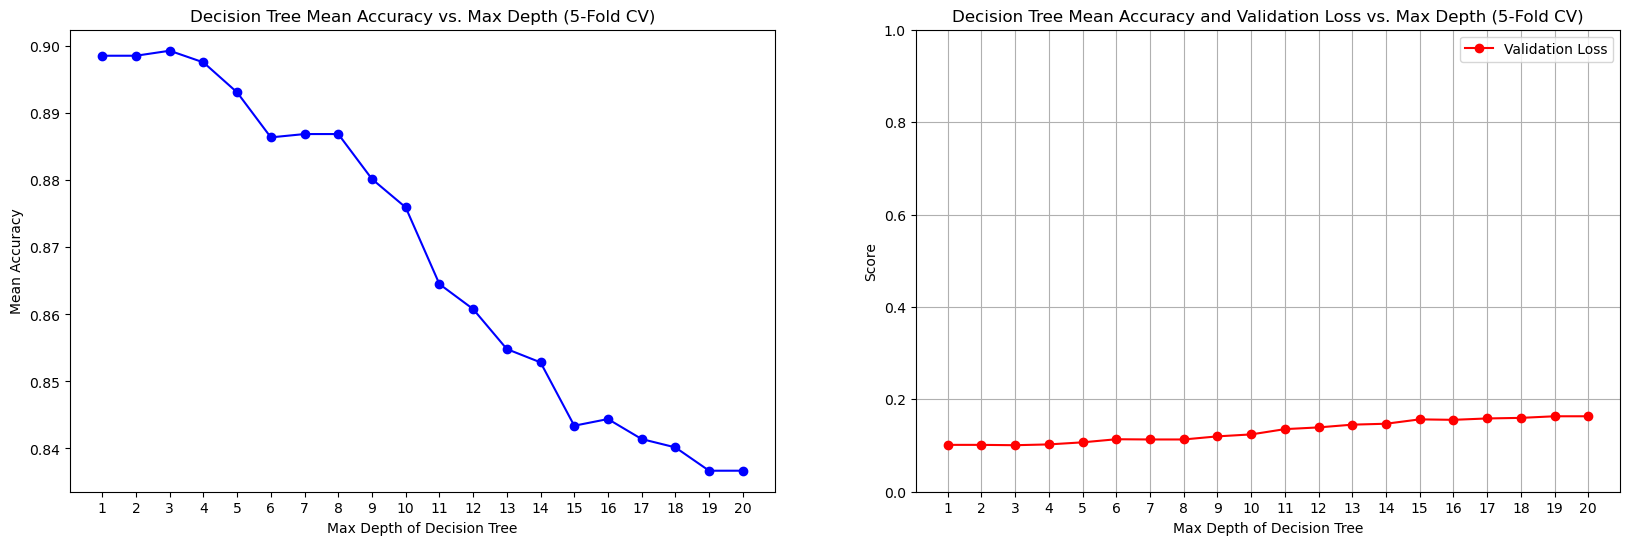

In [44]:
# Plotting the 5 fold cross-validation mean accuracy along with validation loss for different depths of the decision tree with varying depths
depths = range(1, 21)
mean_accuracies = []
validation_losses = []

# Loop over different depths
for depth in depths:
    # Create the model with the current max_depth
    decision_tree_classifier = DecisionTreeClassifier(max_depth=depth, random_state=52)
    
    # Perform 5-fold cross-validation and calculate accuracy
    cv_scores = cross_val_score(decision_tree_classifier, X, y, cv=kf, scoring='accuracy')
    
    # Calculate the mean accuracy from cross-validation
    mean_accuracy = cv_scores.mean()
    validation_loss = 1 - mean_accuracy

    
    # Append the mean accuracy to the list
    mean_accuracies.append(mean_accuracy)
    validation_losses.append(validation_loss)


# Plotting accuracy
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
plt.plot(depths, mean_accuracies, marker='o', label='Mean Accuracy', color='blue')
plt.title('Decision Tree Mean Accuracy vs. Max Depth (5-Fold CV)')
plt.xlabel('Max Depth of Decision Tree')
plt.ylabel('Mean Accuracy')
plt.xticks(depths)

plt.subplot(1, 2, 2)
plt.plot(depths, validation_losses, marker='o', label='Validation Loss', color='red')
plt.title('Decision Tree Mean Accuracy and Validation Loss vs. Max Depth (5-Fold CV)')
plt.xlabel('Max Depth of Decision Tree')
plt.ylabel('Score')
plt.xticks(depths)
plt.ylim(0, 1)
plt.grid()

plt.legend()
plt.show()